1. Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
    precision_score,
    recall_score
)
warnings.filterwarnings('ignore')


Quick Overview of Logistic regression

Y_hat(Z) = 1/(1 + exp(-Z))

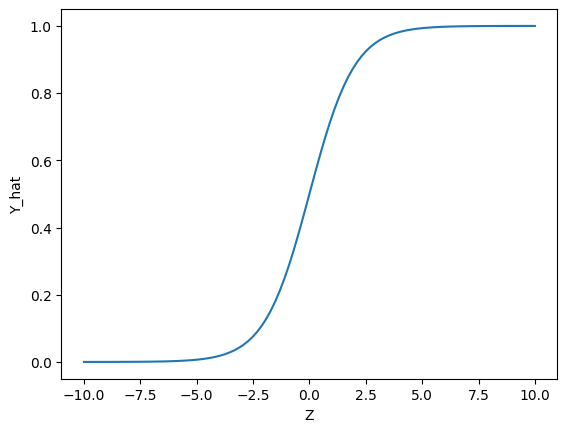

In [2]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

X_linespace = np.linspace(-10, 10, 100)
Y_hat = sigmoid(X_linespace)

plt.plot(X_linespace, Y_hat)
plt.xlabel('Z')
plt.ylabel('Y_hat')
plt.show()